# Prepare dataset: Distracted Driver Detection

Source: https://www.kaggle.com/c/state-farm-distracted-driver-detection

### Prepare Dataset

The dataset has the following structure:

<pre>
state-farm-distracted-driver-detection
|-imgs 
  |-train (contains all train images ordered into ten label class folders)
    |-c0 (the folder contains all images from all drivers for label class c0)
    |-c1 (the folder contains all images from all drivers for label class c1)
      .
      .
      .
    |-c9 (the folder contains all images from all drivers for label class c9)
  |-test (contains thousands of unlabeled images)
|-driver_imgs_list.csv (list of all images from the train set with the information about there class and driver)
|-sample_submission.csv (only interesting if you want to participate in the kaggle challenge)
</pre>

This structure has a significant drawback. If we split the train set randomly, we would have very similar images in the train and the validation set. That is because all classes include images from all drivers that were taken from one video per driver. That is not optimal so we should rearrange the dataset in a way that allows us to split the train data by driver.

The reorganized dataset has the following structure:

<pre>
clean_dataset
|-images (contains all images(train set + validation set))
|-valid.txt (includes filenames for all images that belong to the validation set
</pre>

Note: The image filenames contain the driver id and the class information. For example, p015_c0_img_48693 means it shows driver 15 by doing c0.

In [1]:
import pandas as pd
import os
from shutil import copyfile
import matplotlib.pyplot as plt
from pathlib import Path
import random

In [2]:
data_dir = Path("state-farm-distracted-driver-detection")
image_dir = data_dir/"imgs"
driver_imgs_list_path = data_dir/"driver_imgs_list.csv"
driver_df = pd.read_csv(driver_imgs_list_path)

In [3]:
driver_df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


One example image per driver


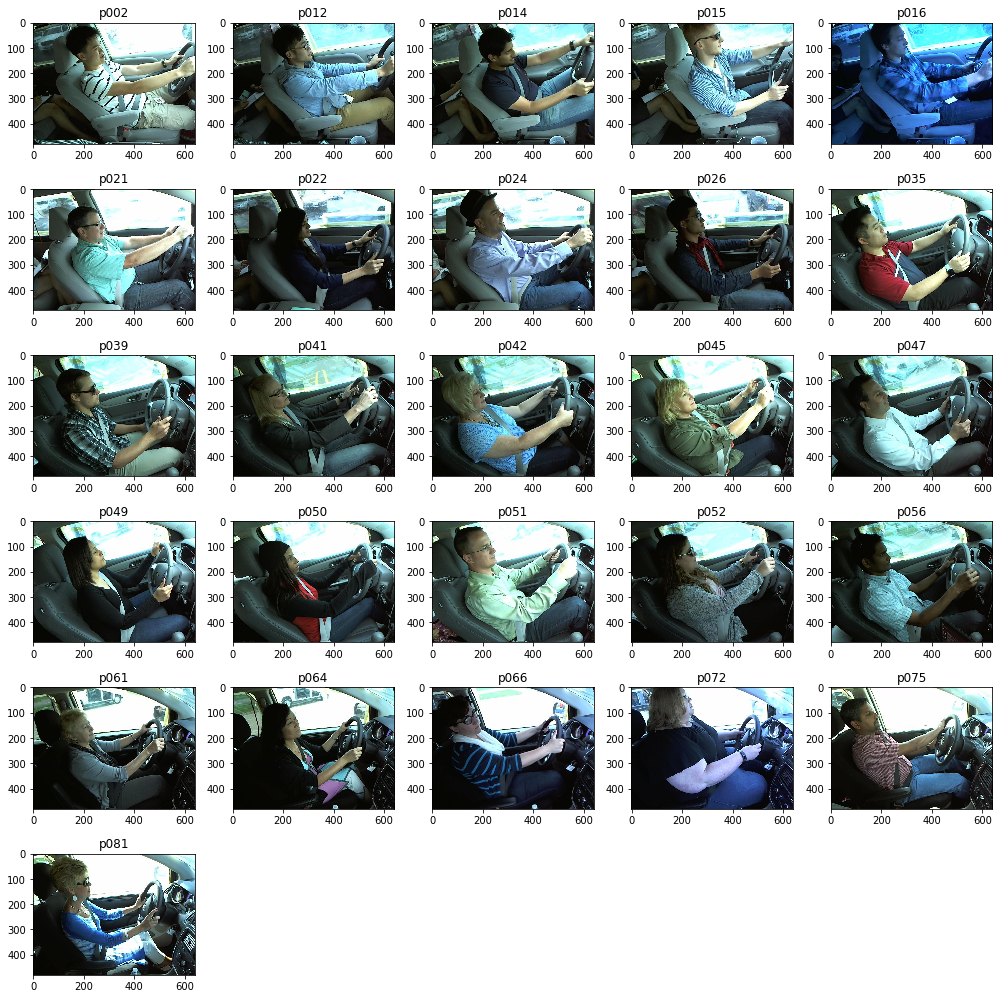

In [4]:
fig=plt.figure(figsize=(14, 14))

for i, subject in enumerate(pd.unique(driver_df["subject"]), 1):
    sub_example = driver_df[driver_df["subject"] == subject].iloc[0]
    class_name = sub_example["classname"]
    img_name = sub_example["img"]
    example_path = image_dir/f"train/{class_name}/{img_name}"
    fig.add_subplot(6, 5, i, title=subject)
    plt.imshow(plt.imread(example_path))
print("One example image per driver")
plt.tight_layout()
plt.show()

In [5]:
male_subjects = ["p002", "p012", "p014", "p015", "p016", "p021", "p024", 
                 "p026", "p035", "p039", "p047", "p051", "p056", "p074"]
female_subjects = ["p022", "p041", "p042", "p045", "p049", "p050", "p052", "p061", "p064", "p066", "p072", "p081"]

In [6]:
len(pd.unique(driver_df["subject"])) == len(male_subjects) + len(female_subjects)

True

In [7]:
# show male vs female statistic
percent_male = round(len(male_subjects) / len(pd.unique(driver_df["subject"])), 2)
percent_female = round(len(female_subjects) / len(pd.unique(driver_df["subject"])), 2)
print("{} percent of subjects are male and {} are female.".format(percent_male, percent_female))

0.54 percent of subjects are male and 0.46 are female.


In [8]:
new_dataset_dir = Path("dataset")
new_img_dir = new_dataset_dir/"images"

In [9]:
# create random validation set with respect to the male vs female statistics
valid_set = []
valid_set.extend(random.sample(male_subjects, k=3))
valid_set.extend(random.sample(female_subjects, k=2))
valid_set

['p015', 'p051', 'p024', 'p066', 'p041']

In [10]:
# create a new training set, including a list of files that can be used for validation. Train/Valid split based on the driver.
valid_file_list = []

if not os.path.exists(new_img_dir):
        os.makedirs(new_img_dir)
        
for i in range(len(driver_df)):
    class_name = driver_df.iloc[i]["classname"]
    img_name = driver_df.iloc[i]["img"]
    subject_name = driver_df.iloc[i]["subject"]
    source_path = image_dir/f"train/{class_name}/{img_name}"
    
    new_file_name = "_".join([subject_name, class_name, img_name])
    
    if subject_name in valid_set:
        valid_file_list.append(new_file_name)
        
    copyfile(source_path, new_img_dir/new_file_name)

In [11]:
with open(new_dataset_dir/"valid.txt", 'w') as f:
    for item in valid_file_list:
        f.write("%s\n" % item)

In [12]:
print("Total number of images in the whole dataset: {}".format(len(driver_df)))
print("Total umber of images in the validation set: {}".format(len(valid_file_list)))
print("Validation set is {} percent of the total dataset".format(round(len(valid_file_list) / len(driver_df), 2)))

Total number of images in the whole dataset: 22424
Total umber of images in the validation set: 4660
Validation set is 0.21 percent of the total dataset
